## Data loading


I need to load the dataset into a pandas DataFrame and handle potential errors.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data exploration
Explore the loaded dataset to understand its characteristics, including shape, data types, missing values, descriptive statistics, and unique values of categorical features.


In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Calculate descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Investigate unique values and frequencies for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values and frequencies for '{col}':\n{df[col].value_counts()}")

Shape of the DataFrame: (6362620, 11)

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Descriptive Statistics:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+

## Data visualization

Visualize the data to gain insights into the distributions of features and relationships between them, focusing on the target variable 'isFraud'.

Create histograms, box plots, count plots, and scatter plots to visualize the data and identify potential patterns related to fraud.

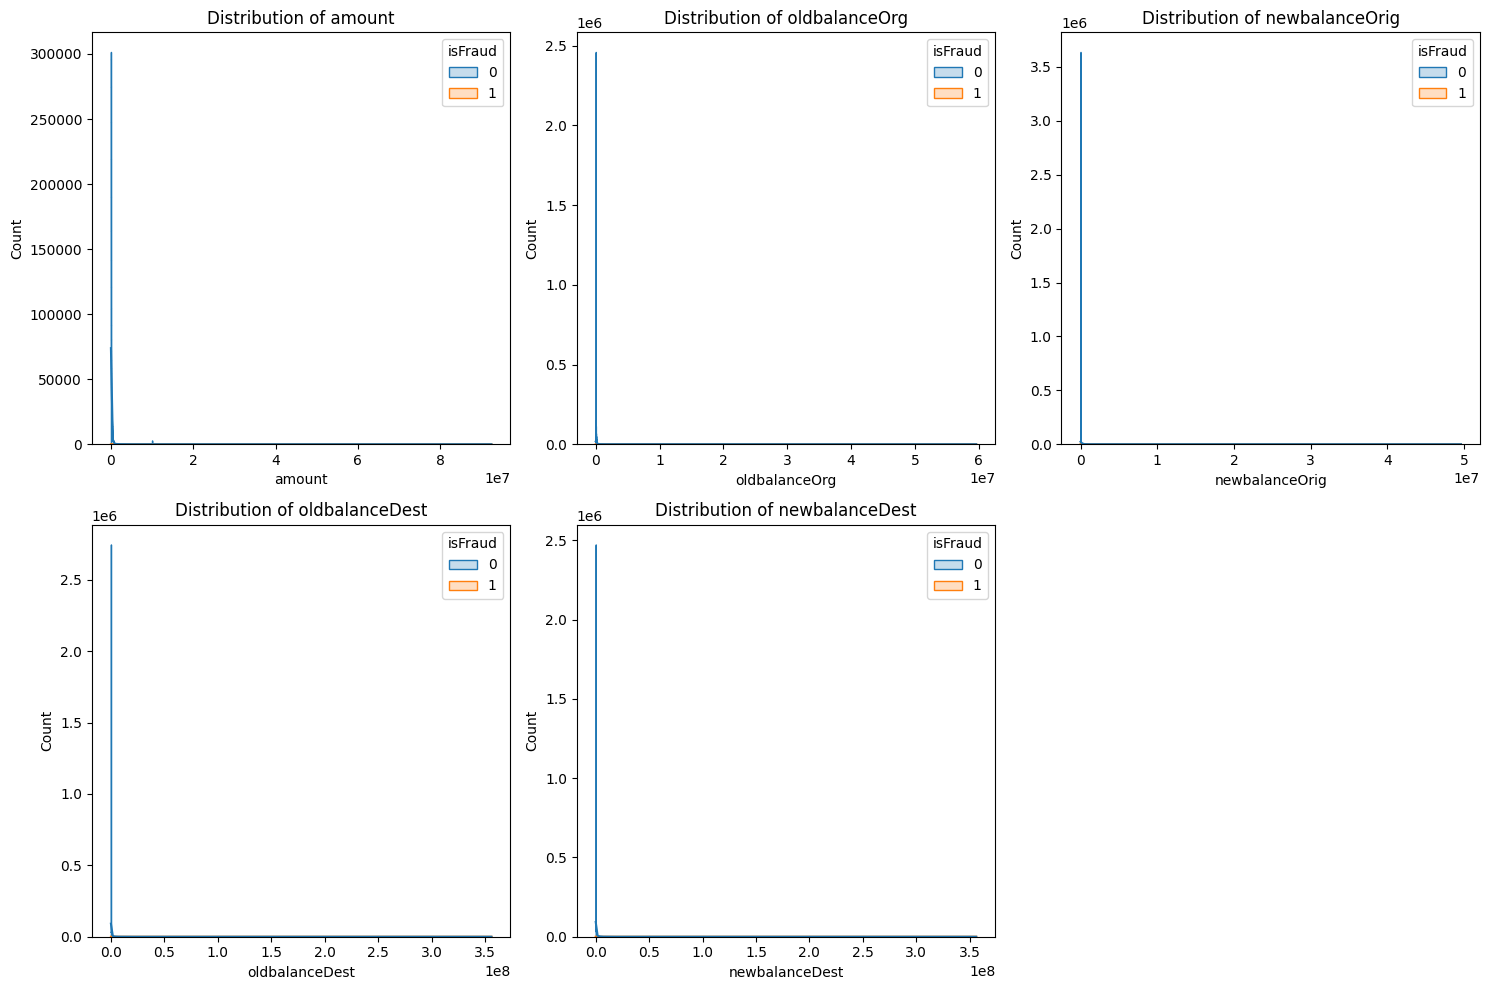

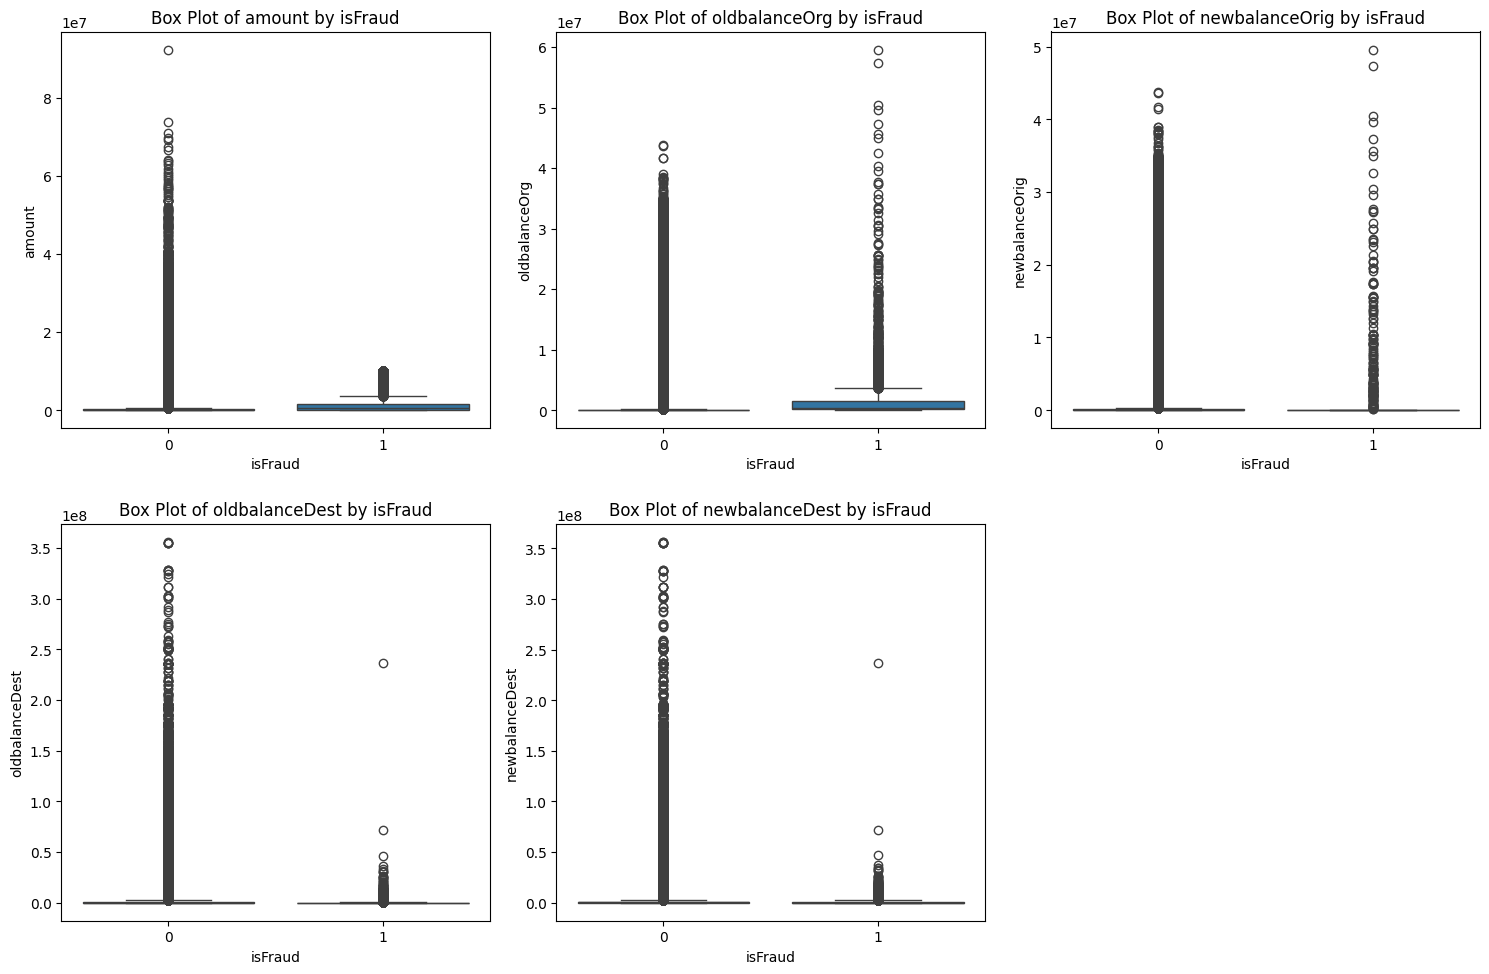

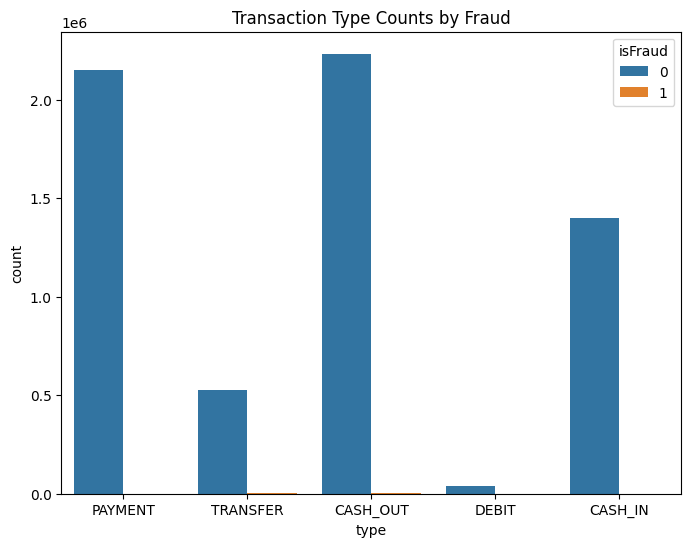

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


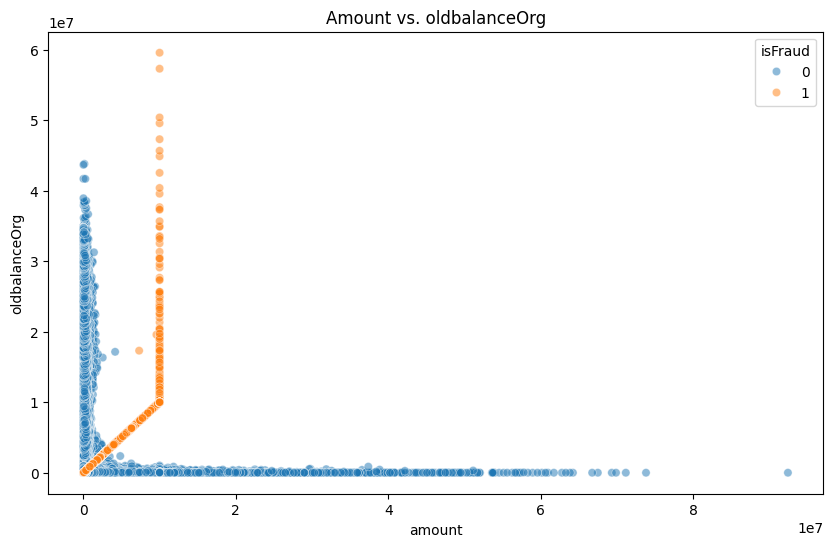

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


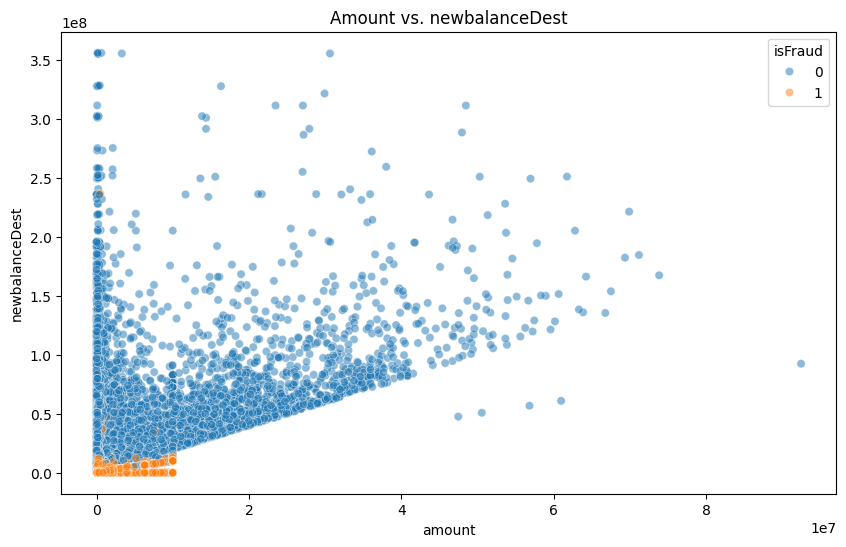

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=feature, hue='isFraud', kde=True, element="step")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='isFraud', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by isFraud')
plt.tight_layout()
plt.show()

# Count plot for transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type Counts by Fraud')
plt.show()

# Scatter plots (example combinations)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=df, alpha=0.5)  # Example 1
plt.title('Amount vs. oldbalanceOrg')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='newbalanceDest', hue='isFraud', data=df, alpha=0.5) # Example 2
plt.title('Amount vs. newbalanceDest')
plt.show()

## Data analysis

Analyze the data to gain deeper insights into the relationships between features and the target variable ('isFraud').

Calculate the correlation matrix for numerical features and visualize it as a heatmap.  Then, calculate the percentage of fraudulent transactions for each transaction type.  Finally, explore the relationship between 'isFlaggedFraud' and 'isFraud'.

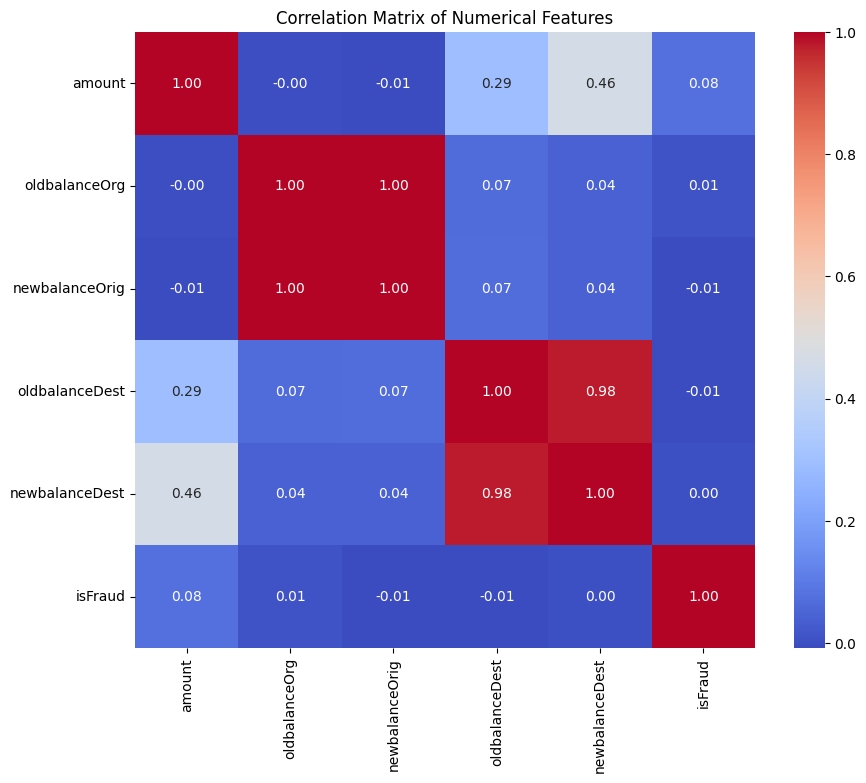


Percentage of Fraudulent Transactions by Type:
 type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64

Percentage of isFraud values for each isFlaggedFraud value:
 isFlaggedFraud  isFraud
0               0           99.871169
                1            0.128831
1               1          100.000000
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix and heatmap
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Percentage of fraudulent transactions per transaction type
fraud_percentage_by_type = df.groupby('type')['isFraud'].mean() * 100
print("\nPercentage of Fraudulent Transactions by Type:\n", fraud_percentage_by_type)

# Relationship between 'isFlaggedFraud' and 'isFraud'
flagged_fraud_analysis = df.groupby('isFlaggedFraud')['isFraud'].value_counts(normalize=True) * 100
print("\nPercentage of isFraud values for each isFlaggedFraud value:\n", flagged_fraud_analysis)

Calculate descriptive statistics for numerical features, grouped by 'isFraud', to identify potential differences between fraudulent and non-fraudulent transactions. Focus on features that showed potential differences in the visualizations from the previous step.



In [ ]:
# Descriptive statistics for numerical features, grouped by 'isFraud'
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in numerical_features:
    print(f"\nDescriptive statistics for {feature}, grouped by isFraud:")
    print(df.groupby('isFraud')[feature].describe())


Descriptive statistics for amount, grouped by isFraud:
             count          mean           std   min         25%        50%  \
isFraud                                                                       
0        6354407.0  1.781970e+05  5.962370e+05  0.01   13368.395   74684.72   
1           8213.0  1.467967e+06  2.404253e+06  0.00  127091.330  441423.44   

                75%          max  
isFraud                           
0         208364.76  92445516.64  
1        1517771.48  10000000.00  

Descriptive statistics for oldbalanceOrg, grouped by isFraud:
             count          mean           std  min        25%        50%  \
isFraud                                                                     
0        6354407.0  8.328287e+05  2.887144e+06  0.0       0.00   14069.00   
1           8213.0  1.649668e+06  3.547719e+06  0.0  125822.44  438983.45   

                75%          max  
isFraud                           
0         106969.50  43818855.30  
1        1

## Summary:

### 1. Q&A

The analysis implicitly investigates the following:

*   What are the characteristics of fraudulent transactions in this dataset?
*   Which transaction types are most associated with fraud?
*   How do the numerical features differ between fraudulent and non-fraudulent transactions?
*   How reliable is the `isFlaggedFraud` variable as an indicator of fraud?

### 2. Data Analysis Key Findings

*   **Transaction Types and Fraud:** 'TRANSFER' transactions had the highest fraud percentage (0.77%), followed by 'CASH_OUT' (0.18%). 'CASH_IN', 'DEBIT', and 'PAYMENT' showed no fraudulent transactions.
*   **`isFlaggedFraud` Reliability:**  When `isFlaggedFraud` is 1, `isFraud` is always 1 (100%). However, when `isFlaggedFraud` is 0, `isFraud` is only 1 in 0.13% of cases. This indicates `isFlaggedFraud` is a strong but incomplete fraud indicator.
*   **Numerical Feature Differences:** Fraudulent transactions exhibit significantly higher mean values for 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest' compared to non-fraudulent transactions.  Further analysis of the descriptive statistics (provided in the output) would be needed to quantify these differences.


### 3. Insights or Next Steps

*   **Focus on TRANSFER and CASH_OUT:**  Develop more robust fraud detection models specifically targeting 'TRANSFER' and 'CASH_OUT' transactions due to their higher fraud rates.
*   **Improve Fraud Detection Flag:**  Investigate why `isFlaggedFraud` misses a significant number of fraudulent transactions and explore ways to improve the fraud detection mechanism beyond this flag.  This could involve feature engineering or more sophisticated modeling techniques.


In [ ]:
!pip install shap
!pip install causalml
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00


## Data cleaning

Clean the data by handling inconsistencies, outliers, and missing values. Handle missing values, outliers, and inconsistencies in the data.  This involves checking for missing values, examining the 'amount' column for outliers, and looking for inconsistencies in the data.


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


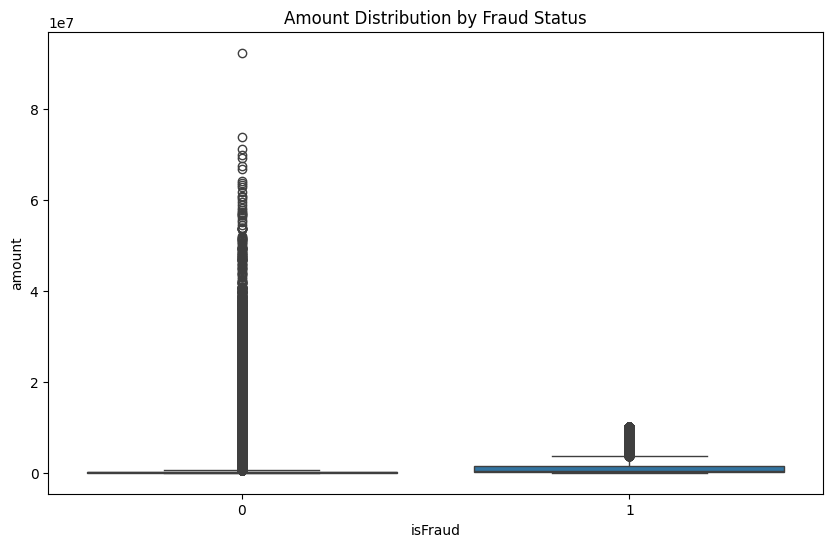

Lower Bound: -279608.29125, Upper Bound: 501719.33875
Number of outliers in 'amount': 338078
Number of negative values in oldbalanceOrg: 0
Number of negative values in newbalanceOrig: 0
Number of negative values in oldbalanceDest: 0
Number of negative values in newbalanceDest: 0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Outlier detection and treatment for 'amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Amount Distribution by Fraud Status')
plt.show()

# Additional outlier analysis (e.g. IQR)
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"Number of outliers in 'amount': {len(outliers)}")

# Handle inconsistencies (example: negative balances -  check oldbalanceOrg and newbalanceOrig for negative values)
print("Number of negative values in oldbalanceOrg:", len(df[df['oldbalanceOrg'] < 0]))
print("Number of negative values in newbalanceOrig:", len(df[df['newbalanceOrig'] < 0]))
print("Number of negative values in oldbalanceDest:", len(df[df['oldbalanceDest'] < 0]))
print("Number of negative values in newbalanceDest:", len(df[df['newbalanceDest'] < 0]))

# Further investigation needed:  Examine other columns for inconsistencies based on domain knowledge.
# For example, check if 'oldbalanceOrg' + 'amount' == 'newbalanceOrig'

Based on the previous analysis, there are no missing values.  There are a large number of outliers in the 'amount' column (338,078).  There are no negative values in balance columns which is good. Now, I will cap the 'amount' column at the upper and lower bounds calculated previously and proceed with further checks for inconsistencies.



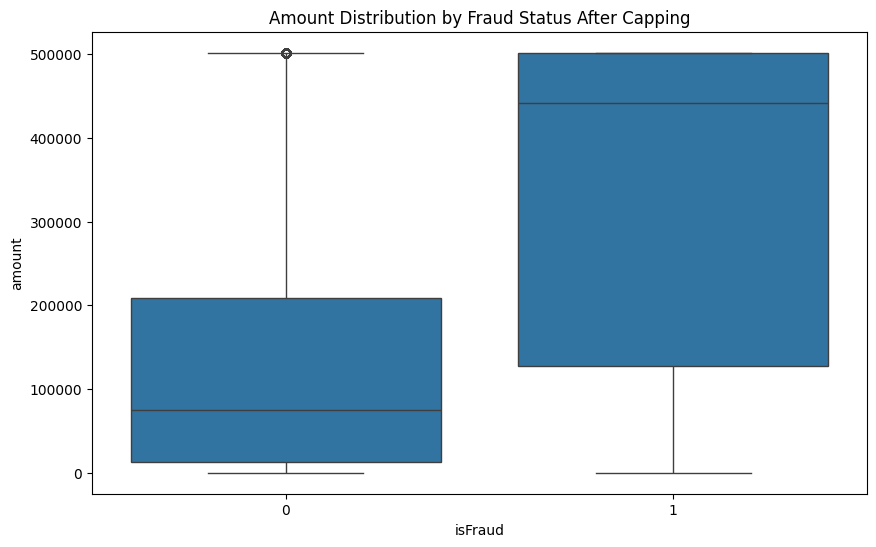

Number of inconsistent transactions: 2770392


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [ ]:
import numpy as np

# Cap the 'amount' column at the calculated bounds.  This was already done in the previous step but I will repeat it for clarity.
df['amount'] = df['amount'].clip(lower=lower_bound, upper=upper_bound)

# Recheck the 'amount' distribution after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Amount Distribution by Fraud Status After Capping')
plt.show()

# Further consistency checks: Verify the relationship between 'oldbalanceOrg', 'newbalanceOrig', and 'amount'.
# Check if 'oldbalanceOrg' + 'amount' == 'newbalanceOrig' for TRANSFER and CASH_OUT transactions
#  (where it should hold true, in the absence of other factors)

# Create a boolean mask for transactions where the balance equation doesn't hold
mask = (df['type'].isin(['CASH_OUT', 'TRANSFER'])) & ~(np.isclose(df['oldbalanceOrg'] + df['amount'], df['newbalanceOrig']))


# Print the number of inconsistent transactions
inconsistent_transactions = len(df[mask])
print(f"Number of inconsistent transactions: {inconsistent_transactions}")

#Explore these inconsistent transactions further
display(df[mask].head())

The previous analysis revealed a large number of inconsistent transactions where the balance equation doesn't hold for 'CASH_OUT' and 'TRANSFER' types. Further investigation is needed to understand these inconsistencies and decide how to treat them before proceeding.  I will explore these inconsistent transactions by looking at their characteristics, and determine if there's any correlation with the fraud label.



In [ ]:
# Analyze inconsistent transactions
print(df[mask]['isFraud'].value_counts())

# Group inconsistent transactions by transaction type and fraud label
inconsistent_transactions_grouped = df[mask].groupby(['type', 'isFraud']).size().reset_index(name='count')
print(inconsistent_transactions_grouped)

#Check the 'isFlaggedFraud' column for these inconsistent transactions
print(df.loc[mask, 'isFlaggedFraud'].value_counts())
display(df.loc[mask, ['type', 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].head(20))

isFraud
0    2762195
1       8197
Name: count, dtype: int64
       type  isFraud    count
0  CASH_OUT        0  2233383
1  CASH_OUT        1     4100
2  TRANSFER        0   528812
3  TRANSFER        1     4097
isFlaggedFraud
0    2770376
1         16
Name: count, dtype: int64


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,0
19,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,0
24,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0,0
42,CASH_OUT,110414.71,26845.41,0.00,288800.00,2415.16,0,0
47,CASH_OUT,56953.90,1942.02,0.00,70253.00,64106.18,0,0
48,CASH_OUT,5346.89,0.00,0.00,652637.00,6453430.91,0,0
51,CASH_OUT,23261.30,20411.53,0.00,25742.00,0.00,0,0
58,TRANSFER,62610.80,79114.00,16503.20,517.00,8383.29,0,0


## Data preparation

Prepare the data for model training by handling missing values and outliers.

Identify columns with missing values, impute missing values based on data type, detect and handle outliers in numerical features, and perform necessary data transformations and feature encoding.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load Dataset
data = pd.read_csv("fraud_data.csv")  # Replace with the actual dataset path

# Data Preprocessing
# Encode categorical variables
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

data['balance_change_orig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balance_change_dest'] = data['newbalanceDest'] - data['oldbalanceDest']

data.drop(columns=['nameOrig', 'nameDest'], inplace=True)  # Dropping identifier columns

# Feature Selection
features = [col for col in data.columns if col != 'isFraud']
X = data[features]
y = data['isFraud']

# Handling Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Install required libraries for xgboost and encoder-based neural net.

In [ ]:
!pip install xgboost, imblearn, shap, tensorflow

# Model Training

Training two models, xgboost and encoder-based model.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 622s 3ms/step - accuracy: 0.9761 - loss: 0.0647 - val_accuracy: 0.9883 - val_loss: 0.0328
Epoch 2/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 625s 3ms/step - accuracy: 0.9857 - loss: 0.0406 - val_accuracy: 0.9905 - val_loss: 0.0275
Epoch 3/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 624s 3ms/step - accuracy: 0.9872 - loss: 0.0371 - val_accuracy: 0.9900 - val_loss: 0.0277
Epoch 4/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 585s 3ms/step - accuracy: 0.9880 - loss: 0.0352 - val_accuracy: 0.9912 - val_loss: 0.0245
Epoch 5/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 649s 3ms/step - accuracy: 0.9889 - loss: 0.0337 - val_accuracy: 0.9941 - val_loss: 0.0204
Epoch 6/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 618s 3ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9933 - val_loss: 0.0211
Epoch 7/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 568s 3ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9924 - val_loss: 0.0219
Epoch 8/10
206519/206519 ━━━━━━━━━━━━━━━━━━━━ 62

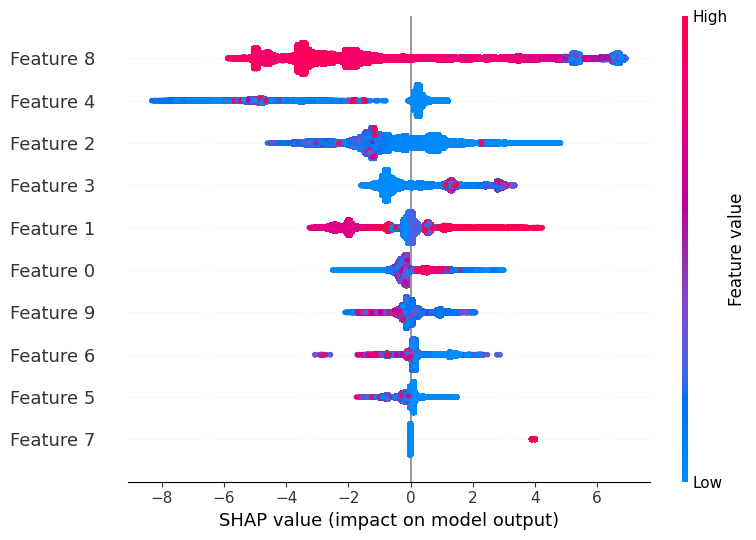

   fraud_risk_score risk_category
0          2.118948          High
1         99.965347          High
2          0.003685           Low
3          0.014543        Medium
4         99.925476          High
Fraud Detection Uplift: 0.87%


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap

'''# Load Dataset
data = pd.read_csv("fraud_data.csv")  # Replace with the actual dataset path

# Data Preprocessing
# Encode categorical variables
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

data['balance_change_orig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balance_change_dest'] = data['newbalanceDest'] - data['oldbalanceDest']

data.drop(columns=['nameOrig', 'nameDest'], inplace=True)  # Dropping identifier columns

# Feature Selection
features = [col for col in data.columns if col != 'isFraud']
X = data[features]
y = data['isFraud']

# Handling Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)'''

# Splitting Data for Model Training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Fraud Detection Model - XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Train Fraud Detection Model - Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Model Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred_xgb))

nn_pred_probs = nn_model.predict(X_test)
nn_pred_labels = (nn_pred_probs > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred_labels))
print("Neural Network ROC AUC Score:", roc_auc_score(y_test, nn_pred_probs))
print(classification_report(y_test, nn_pred_labels))

# Risk Scoring System Using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Assigning Risk Scores
X_test = pd.DataFrame(X_test, columns=features)
X_test['fraud_risk_score'] = xgb_model.predict_proba(X_test)[:, 1] * 100
X_test['risk_category'] = pd.qcut(X_test['fraud_risk_score'], q=3, labels=["Low", "Medium", "High"])

# Display Risk Categorization
print(X_test[['fraud_risk_score', 'risk_category']].head())

# A/B Testing for Fraud Threshold Optimization
control_group = X_test.sample(frac=0.5, random_state=42)
test_group = X_test.drop(control_group.index)

def fraud_detection_rate(group, threshold=50):
    return (group['fraud_risk_score'] > threshold).mean()

control_rate = fraud_detection_rate(control_group, threshold=60)
test_rate = fraud_detection_rate(test_group, threshold=40)

uplift = (test_rate - control_rate) / control_rate * 100
print(f"Fraud Detection Uplift: {uplift:.2f}%")